In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [3]:
ISF = pd.read_excel(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\StabillityTest-Bias\020523-r1c2-ISF.xls")
AS = pd.read_excel(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\StabillityTest-Bias\020524-r1c2-AS.xls")
PBS = pd.read_excel(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\StabillityTest-Bias\020524-r1c2-PBS.xls")

WARNING *** file size (342282) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (309574) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (265466) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [4]:
ISF

Time        DrainI    DrainV         GateI     GateV  DIFF_DRIFT
0        2.061425  9.999741e-07  4.445053  9.999561e-07  3.817633    0.627420
1        3.144652  9.999740e-07  4.447062  9.999557e-07  3.822399    0.624664
2        4.227833  9.999736e-07  4.451674  9.999561e-07  3.827209    0.624465
3        5.311021  9.999742e-07  4.458480  9.999561e-07  3.833515    0.624965
4        6.394244  9.999738e-07  4.467558  9.999561e-07  3.839562    0.627996
...           ...           ...       ...           ...       ...         ...
2407  2609.355048  9.999718e-07  5.250054  9.999530e-07  4.301416    0.948638
2408  2610.438239  9.999713e-07  5.248760  9.999535e-07  4.300660    0.948100
2409  2611.521491  9.999715e-07  5.248662  9.999535e-07  4.300414    0.948248
2410  2612.604743  9.999709e-07  5.249463  9.999533e-07  4.300724    0.948740
2411  2613.687872  9.999716e-07  5.248762  9.999537e-07  4.300467    0.948295

[2412 rows x 6 columns]

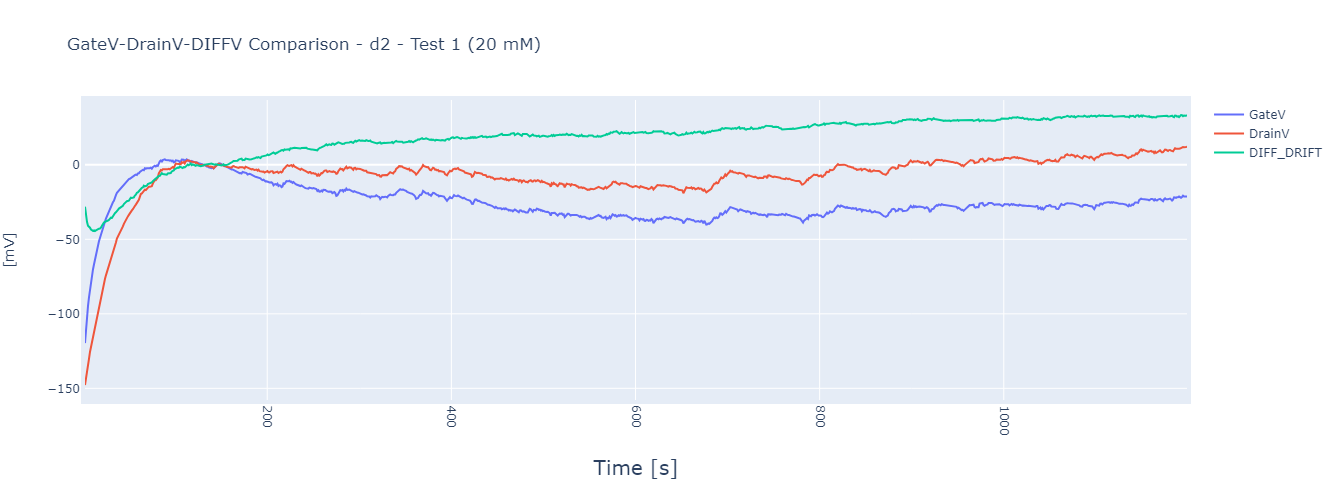

<Figure size 936x1440 with 0 Axes>

In [5]:
plt.figure(figsize=(13,20))
fig = go.Figure()
df = AS
x = 0
fig.add_traces([go.Scatter(x=df['Time'][df['Time']<=1200], y=(df['GateV'][df['Time']<=1200]-df['GateV'].iloc[120])*1000,name = "GateV"),
                go.Scatter(x=df['Time'][df['Time']<=1200], y=(df['DrainV'][df['Time']<=1200]-df['DrainV'].iloc[120])*1000, name = "DrainV"),
                go.Scatter(x=df['Time'][df['Time']<=1200], y=(df['DIFF_DRIFT'][df['Time']<=1200]-df['DIFF_DRIFT'].iloc[120])*1000,name = "DIFF_DRIFT")])

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    title = 'GateV-DrainV-DIFFV Comparison - d2 - Test 1 (20 mM)'
)
fig.update_xaxes(
        tickangle = 90,
        title_text = "Time [s]",
        title_font = {"size": 20},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "[mV]",
        title_standoff = 25)
fig.show()

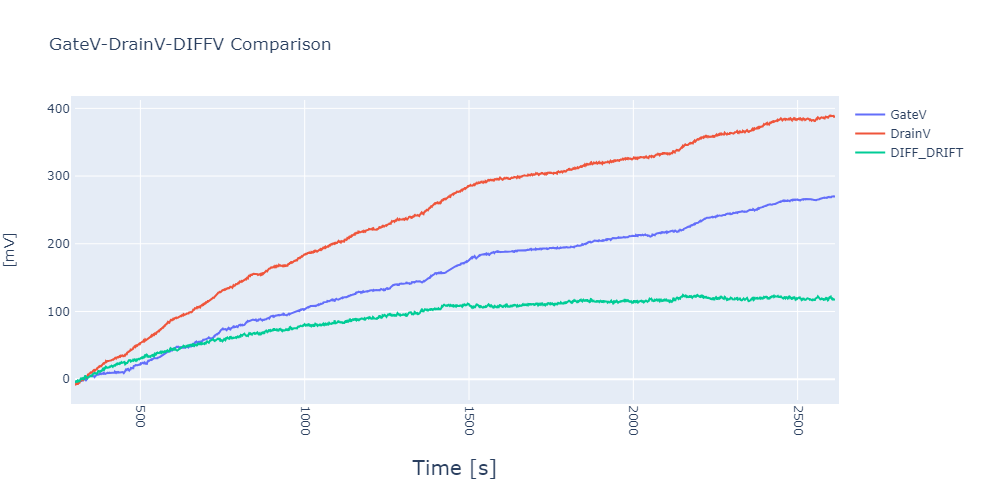

<Figure size 936x1440 with 0 Axes>

In [55]:
plt.figure(figsize=(13,20))
fig = go.Figure()
df = ISF
x = 300
fig.add_traces([go.Scatter(x=df['Time'][df['Time']>=x], y=(df['GateV'][df['Time']>=x]-df['GateV'].iloc[x])*1000,name = "GateV"),
                go.Scatter(x=df['Time'][df['Time']>=x], y=(df['DrainV'][df['Time']>=x]-df['DrainV'].iloc[x])*1000, name = "DrainV"),
                go.Scatter(x=df['Time'][df['Time']>=x], y=(df['DIFF_DRIFT'][df['Time']>=x]-df['DIFF_DRIFT'].iloc[x])*1000,name = "DIFF_DRIFT")])

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    title = ' GateV-DrainV-DIFFV Comparison'
)
fig.update_xaxes(
        tickangle = 90,
        title_text = "Time [s]",
        title_font = {"size": 20},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "[mV]",
        title_standoff = 25)
fig.show()

## Artificial Sweat

In [81]:
x = 300
while  np.std((AS['DIFF_DRIFT'][AS['Time']>=x]-AS['DIFF_DRIFT'].iloc[x])*1000) > 6: 
    x = x+30
print('Time after stabilization (minutes): ',round(x/60))

mean_AS = np.mean((AS['DIFF_DRIFT'][AS['Time']>=x]-AS['DIFF_DRIFT'].iloc[x])*1000)
std_AS =  np.std((AS['DIFF_DRIFT'][AS['Time']>=x]-AS['DIFF_DRIFT'].iloc[x])*1000)
print('AS -> mean Diff V: ', mean_AS, 'mV, std: ',std_AS, 'mV')
mean_AS_after3min = np.mean((AS['GateV'][AS['Time']>=x]-AS['GateV'].iloc[x])*1000)
std_AS_after3min =  np.std((AS['GateV'][AS['Time']>=x]-AS['GateV'].iloc[x])*1000)
print('AS -> Gate V: ', mean_AS_after3min, 'mV, std: ',std_AS_after3min, 'mV')
mean_AS_after3min = np.mean((AS['DrainV'][AS['Time']>=x]-AS['DrainV'].iloc[x])*1000)
std_AS_after3min =  np.std((AS['DrainV'][AS['Time']>=x]-AS['DrainV'].iloc[x])*1000)
print('AS -> Gate V: ', mean_AS_after3min, 'mV, std: ',std_AS_after3min, 'mV')

Time after stabilization (minutes):  5
AS -> mean Diff V:  14.993997971807953 mV, std:  5.995545809721466 mV
AS -> Gate V:  15.269719637357271 mV, std:  24.88857583998864 mV
AS -> Gate V:  30.263717609160317 mV, std:  29.314839568195517 mV


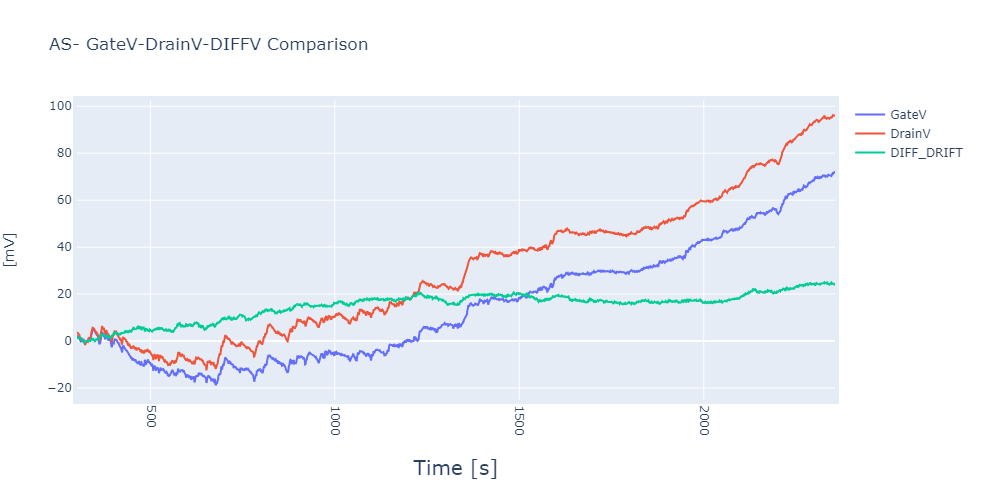

<Figure size 936x1440 with 0 Axes>

In [82]:
plt.figure(figsize=(13,20))
fig = go.Figure()
df = AS
x = 300
fig.add_traces([go.Scatter(x=df['Time'][df['Time']>=x], y=(df['GateV'][df['Time']>=x]-df['GateV'].iloc[x])*1000,name = "GateV"),
                go.Scatter(x=df['Time'][df['Time']>=x], y=(df['DrainV'][df['Time']>=x]-df['DrainV'].iloc[x])*1000, name = "DrainV"),
                go.Scatter(x=df['Time'][df['Time']>=x], y=(df['DIFF_DRIFT'][df['Time']>=x]-df['DIFF_DRIFT'].iloc[x])*1000,name = "DIFF_DRIFT")])

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    title = 'AS- GateV-DrainV-DIFFV Comparison'
)
fig.update_xaxes(
        tickangle = 90,
        title_text = "Time [s]",
        title_font = {"size": 20},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "[mV]",
        title_standoff = 25)
fig.show()

hypothesis:
- first test run was AS, then ISF and then PBS. It might be that changing the media altered the performances.Retry with a different device
- The device needs more time to stabilize in ISF

## ISF

In [98]:
x = 300
df = ISF
while  np.std((df['DIFF_DRIFT'][df['Time']>=x]-df['DIFF_DRIFT'].iloc[x])*1000) > 15: 
    x = x+30
print('Time after stabilization (minutes): ',round(x/60))

mean= np.mean((df['DIFF_DRIFT'][df['Time']>=x]-df['DIFF_DRIFT'].iloc[x])*1000)
std =  np.std((df['DIFF_DRIFT'][df['Time']>=x]-df['DIFF_DRIFT'].iloc[x])*1000)
print('ISF -> mean Diff V: ', mean, 'mV, std: ',std, 'mV')
mean= np.mean((df['GateV'][df['Time']>=x]-df['GateV'].iloc[x])*1000)
std =  np.std((df['GateV'][df['Time']>=x]-df['GateV'].iloc[x])*1000)
print('ISF -> gate V: ', mean, 'mV, std: ',std, 'mV')
mean= np.mean((df['DrainV'][df['Time']>=x]-df['DrainV'].iloc[x])*1000)
std =  np.std((df['DrainV'][df['Time']>=x]-df['DrainV'].iloc[x])*1000)
print('ISF -> Drain V: ', mean, 'mV, std: ',std, 'mV')

Time after stabilization (minutes):  14
ISF -> mean Diff V:  33.42276922664019 mV, std:  14.890909704560826 mV
ISF -> gate V:  93.25523406082058 mV, std:  52.21507017124503 mV
ISF -> Drain V:  126.67800328746345 mV, std:  66.36069921647572 mV


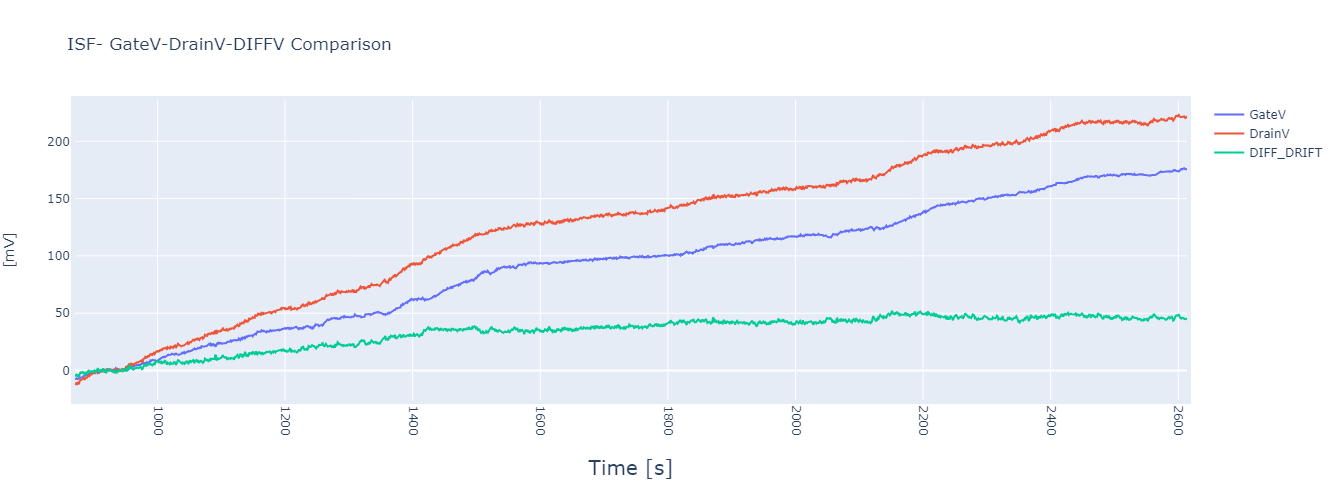

<Figure size 936x1440 with 0 Axes>

In [94]:
plt.figure(figsize=(13,20))
fig = go.Figure()
df = ISF
fig.add_traces([go.Scatter(x=df['Time'][df['Time']>=x], y=(df['GateV'][df['Time']>=x]-df['GateV'].iloc[x])*1000,name = "GateV"),
                go.Scatter(x=df['Time'][df['Time']>=x], y=(df['DrainV'][df['Time']>=x]-df['DrainV'].iloc[x])*1000, name = "DrainV"),
                go.Scatter(x=df['Time'][df['Time']>=x], y=(df['DIFF_DRIFT'][df['Time']>=x]-df['DIFF_DRIFT'].iloc[x])*1000,name = "DIFF_DRIFT")])

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    title = 'ISF- GateV-DrainV-DIFFV Comparison'
)
fig.update_xaxes(
        tickangle = 90,
        title_text = "Time [s]",
        title_font = {"size": 20},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "[mV]",
        title_standoff = 25)
fig.show()

In [105]:
df = PBS
x = 300
while  np.std((df['DIFF_DRIFT'][(df['Time']>=x) & (df['Time']<1900)]-df['DIFF_DRIFT'].iloc[x])*1000) > 10: 
    x = x+30
print('Time after stabilization (minutes): ',round(x/60))
mean= np.mean((df['DIFF_DRIFT'][(df['Time']>=x) & (df['Time']<1900)]-df['DIFF_DRIFT'].iloc[x])*1000)
std =  np.std((df['DIFF_DRIFT'][(df['Time']>=x) & (df['Time']<1900)]-df['DIFF_DRIFT'].iloc[x])*1000)
print('PBS -> mean Diff V: ', mean, 'mV, std: ',std, 'mV')
mean= np.mean((df['GateV'][(df['Time']>=x) & (df['Time']<1900)]-df['GateV'].iloc[x])*1000)
std =  np.std((df['GateV'][(df['Time']>=x) & (df['Time']<1900)]-df['GateV'].iloc[x])*1000)
print('PBS -> gate V: ', mean, 'mV, std: ',std, 'mV')
mean= np.mean((df['DrainV'][(df['Time']>=x) & (df['Time']<1900)]-df['DrainV'].iloc[x])*1000)
std =  np.std((df['DrainV'][(df['Time']>=x) & (df['Time']<1900)]-df['DrainV'].iloc[x])*1000)
print('PBS -> Drain V: ', mean, 'mV, std: ',std, 'mV')

Time after stabilization (minutes):  10
600
ISF -> mean Diff V:  19.57826733588644 mV, std:  9.429858788869764 mV
ISF -> gate V:  9.166801373163858 mV, std:  6.267431213789732 mV
ISF -> Drain V:  28.745068709055584 mV, std:  14.95670799842269 mV


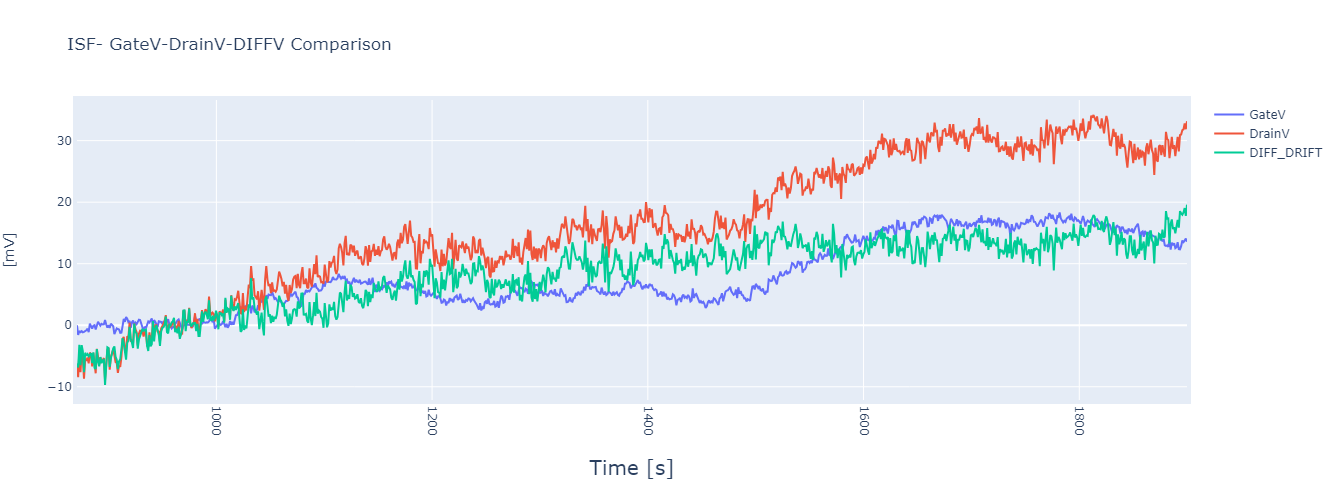

<Figure size 936x1440 with 0 Axes>

In [104]:
plt.figure(figsize=(13,20))
fig = go.Figure()
df = PBS
fig.add_traces([go.Scatter(x=df['Time'][(df['Time']>=x) & (df['Time']<1900)], y=(df['GateV'][(df['Time']>=x) & (df['Time']<1900)]-df['GateV'].iloc[x])*1000,name = "GateV"),
                go.Scatter(x=df['Time'][(df['Time']>=x) & (df['Time']<1900)], y=(df['DrainV'][(df['Time']>=x) & (df['Time']<1900)]-df['DrainV'].iloc[x])*1000, name = "DrainV"),
                go.Scatter(x=df['Time'][(df['Time']>=x) & (df['Time']<1900)], y=(df['DIFF_DRIFT'][(df['Time']>=x) & (df['Time']<1900)]-df['DIFF_DRIFT'].iloc[x])*1000,name = "DIFF_DRIFT")])

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    title = 'PBS- GateV-DrainV-DIFFV Comparison'
)
fig.update_xaxes(
        tickangle = 90,
        title_text = "Time [s]",
        title_font = {"size": 20},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "[mV]",
        title_standoff = 25)
fig.show()